Downloading...
From: https://drive.google.com/uc?id=13yYiAdON8qW3L_5LMa0QcWWgKwax7xJ3
To: /content/IMG_1473.jpg
3.27MB [00:00, 105MB/s]
4032 3024


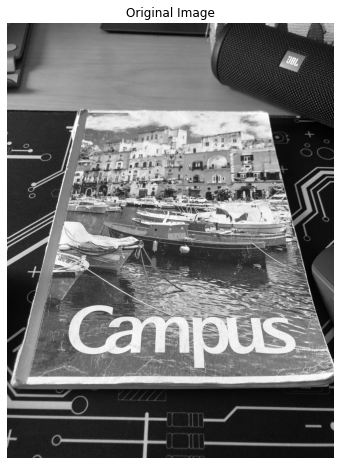

In [ ]:
!gdown --id 13yYiAdON8qW3L_5LMa0QcWWgKwax7xJ3

import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import math
import os
import random
import re
import sys
from sklearn import datasets, linear_model
import numpy as np 

filename = './IMG_1473.jpg'
image = cv2.imread(filename, 0)
height, width = image.shape[0], image.shape[1]
print(height, width)
# Show image
plt.figure(figsize=(12, 8))
plt.imshow(image, cmap='gray',norm=NoNorm())
plt.title('Original Image')
plt.axis('off')
plt.show()



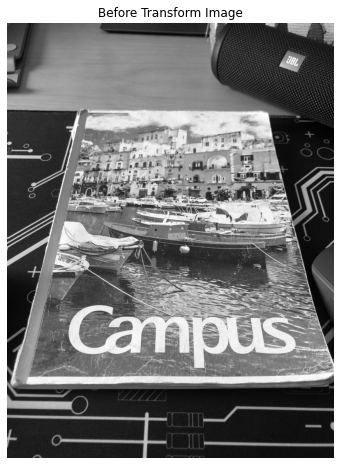

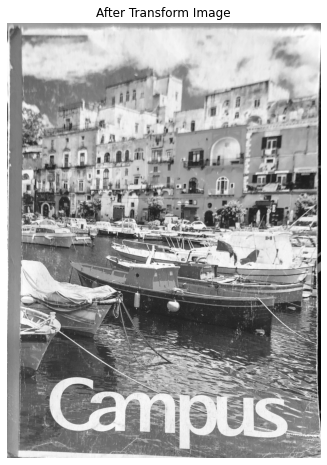

In [ ]:
def Linear_Regression(grid):
    grid = np.array(grid)
    y = grid[:,-1]
    y = np.array([y]).T
    X = grid[:,:-1]
    # Building Xbar 
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)
    regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)
    return regr.coef_[0]

matrix_start = np.array([[round(2/9*width),round(2.35/12*height)],[round(7.15/9*width),round(2.4/12*height)],[round(0.2/9*width),round(10/12*height)],[round(9/9*width - 1),round(9.62/12*height)]])

matrix_end = np.array([[0,0], [1799,0], [0,2499], [1799,2499]])

grid = []
for i in range(len(matrix_end)):
  grid.append([matrix_start[i,0], matrix_start[i,1],1,0,0,0,-1*matrix_start[i,0]*matrix_end[i,0],-1*matrix_end[i,0]*matrix_start[i,1],matrix_end[i,0]])
  grid.append([0,0,0,matrix_start[i,0], matrix_start[i,1],1,-1*matrix_start[i,0]*matrix_end[i,1],-1*matrix_start[i,1]*matrix_end[i,1],matrix_end[i,1]])

grid = np.array(grid)

# predict = Linear_Regression(grid)
# predict[3] = -1090.518755109
# predict[6] = -1672.009972861
# predict = np.append(predict[1:],1)
# predict = predict.reshape(3,3)

predict = np.dot(np.linalg.pinv(grid[:,:-1]), grid[:,-1].T)
predict = np.append(predict,1)
predict = predict.reshape(3,3)

P_ = np.array([[x, y, 1] for y in range(2500) for x in range(1800)])
M_ = np.linalg.pinv(predict)
P = np.dot(M_, P_.T)
P = P.T

def my_round(x, max):
  x = int(x)
  if x < 0:
    return 0
  elif x > max:
    return max
  return x

P = np.array([[my_round(x[1]/x[2], height - 1), my_round(x[0]/x[2], width - 1)] for x in P])

img = np.zeros((2500,1800))

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(image, cmap='gray',norm=NoNorm())
plt.title('Before Transform Image')
plt.axis('off')
plt.show()

for i in range(len(P)):
  p = P[i]
  p_ = P_[i]
  img[p_[1],p_[0]] = image[p[0],p[1]]

img = np.array(img, dtype='int16')
# Show image
plt.figure(figsize=(12, 8))
plt.imshow(img, cmap='gray',norm=NoNorm())
plt.title('After Transform Image')
plt.axis('off')
plt.show()

Downloading...
From: https://drive.google.com/uc?id=1a3OU-JrN4rseni-akiHJFZ1e9EN-_DE8
To: /content/IMG_1474.jpg
3.22MB [00:00, 97.1MB/s]
(4032, 3024)


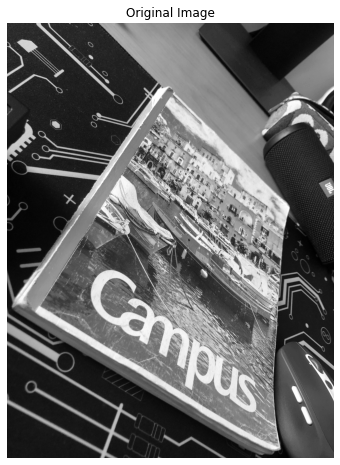

In [ ]:
!gdown --id 1a3OU-JrN4rseni-akiHJFZ1e9EN-_DE8

filename = './IMG_1474.jpg'
image = cv2.imread(filename, 0)
print(image.shape)
# Show image
plt.figure(figsize=(12, 8))
plt.imshow(image, cmap='gray',norm=NoNorm())
plt.title('Original Image')
plt.axis('off')
plt.show()

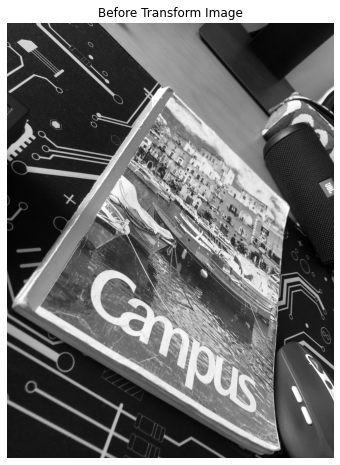

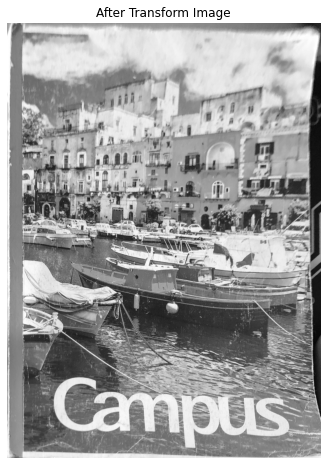

In [ ]:
matrix_start = np.array([[round(4.4/9*width),round(1.7/12*height)],[round(7.8/9*width),round(5/12*height)],[round(0.3/9*width),round(7.7/12*height)],[round(7.3/9*width - 1),round(11.7/12*height)]])

matrix_end = np.array([[0,0], [1799,0], [0,2499], [1799,2499]])

grid = []
for i in range(len(matrix_end)):
  grid.append([matrix_start[i,0], matrix_start[i,1],1,0,0,0,-1*matrix_start[i,0]*matrix_end[i,0],-1*matrix_end[i,0]*matrix_start[i,1],matrix_end[i,0]])
  grid.append([0,0,0,matrix_start[i,0], matrix_start[i,1],1,-1*matrix_start[i,0]*matrix_end[i,1],-1*matrix_start[i,1]*matrix_end[i,1],matrix_end[i,1]])

grid = np.array(grid)

predict = np.dot(np.linalg.pinv(grid[:,:-1]), grid[:,-1].T)
predict = np.append(predict,1)
predict = predict.reshape(3,3)

P_ = np.array([[x, y, 1] for y in range(2500) for x in range(1800)])
M_ = np.linalg.pinv(predict)
P = np.dot(M_, P_.T)
P = P.T

P = np.array([[my_round(x[1]/x[2], height - 1), my_round(x[0]/x[2], width - 1)] for x in P])

img = np.zeros((2500,1800))

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(image, cmap='gray',norm=NoNorm())
plt.title('Before Transform Image')
plt.axis('off')
plt.show()

for i in range(len(P)):
  p = P[i]
  p_ = P_[i]
  img[p_[1],p_[0]] = image[p[0],p[1]]

img = np.array(img, dtype='int16')
# Show image
plt.figure(figsize=(12, 8))
plt.imshow(img, cmap='gray',norm=NoNorm())
plt.title('After Transform Image')
plt.axis('off')
plt.show()